<a href="https://colab.research.google.com/github/Bastinjob/Decision-Tree---Iris-dataset/blob/main/PREDICTION_USING_DECISION_TREE_ALGORITHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME : BASTIN BAJIYO JOB

EMAIL : bastinjob1998@gmail.com

## PREDICTION USING DECISION TREE ALGORITHM



### Introduction

In this programming task, we implement the Decision Tree Algorithm to predict the flower species using the Iris Dataset.

We also visualise the decison tree after training it.

Programming Language : **Python**

Machine-Learning Library : **SciKit-Learn**

In [1]:
# Importing the necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [36]:
from sklearn.datasets import load_iris

iris = load_iris()

data_features = pd.DataFrame(data = iris.data, columns = iris.feature_names)

data_target = np.array(iris.target)

data_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Data Pre-Processing

Splitting the arranged data into training and testing sets

In [21]:
#Train-Test Split

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(data_features,data_target,test_size = 0.25,random_state = 0)

### Training the Model

In [22]:
#Import and Initialise the necessary Model

from sklearn.tree import DecisionTreeClassifier
decision_tree  = DecisionTreeClassifier()

#Train in the Model with the dataset

decision_tree.fit(X_train,Y_train)

print('Training Successful')

Training Successful


### Visualising the Decision Tree

In [23]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


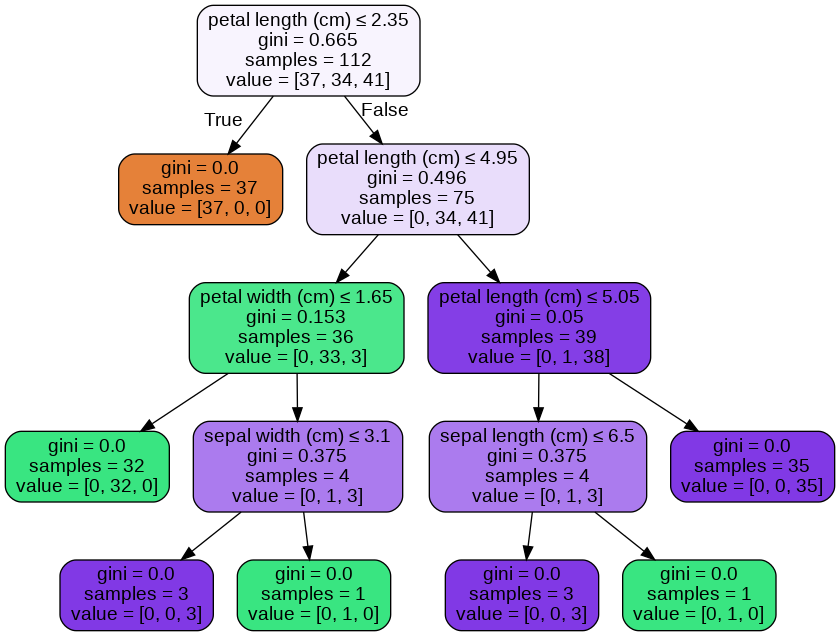

In [24]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Testing the Model

Now that we have trained the Decision Tree Classifier, it is time to test it using the Test set.

In [26]:
#Making Predictions
prediction = decision_tree.predict(X_test)

comparison = pd.DataFrame({'Actual' :Y_test, 'Predicted':prediction})
comparison.head()

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0


### Evaluating the Model

We use **Accuracy Score** as the evaluation Metric. It gives the percentage of right predictions.

In [29]:
from sklearn.metrics import accuracy_score

Acc = accuracy_score(Y_test,prediction)
print("Accuracy : {} %".format(Acc*100))

Accuracy : 97.36842105263158 %


### Testing with a new Sample Data

Finally we test out the moel with a new input of our own. 

In [35]:
y_pred = decision_tree.predict([[5.3,4.2,3.7,5.5]])

print('Predicted label : {}'.format(y_pred))

Predicted label : [1]


Label [1] corresponds to the Iris-Versicolor species